# Intro to regression with neural network


In [128]:
import tensorflow as tf
print(tf.__version__)
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True

2.15.0


2024-02-13 06:03:10.903094: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: UNKNOWN ERROR (34)


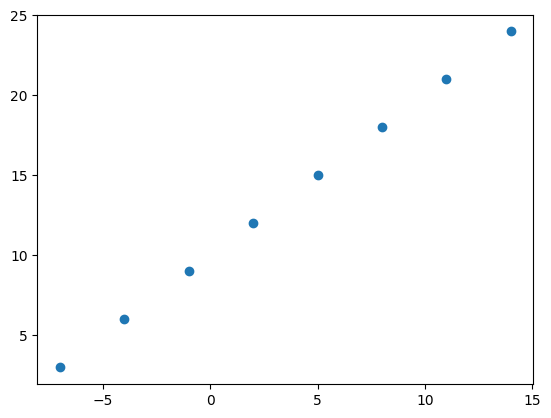

In [2]:
# Creating the data top view and fit
sess = tf.compat.v1.Session(config=config)
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Inputs and Output Shapes

In [4]:
#Demo
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[0].ndim

0

In [8]:
#Turn our Numpy arrays into Tensors

x = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

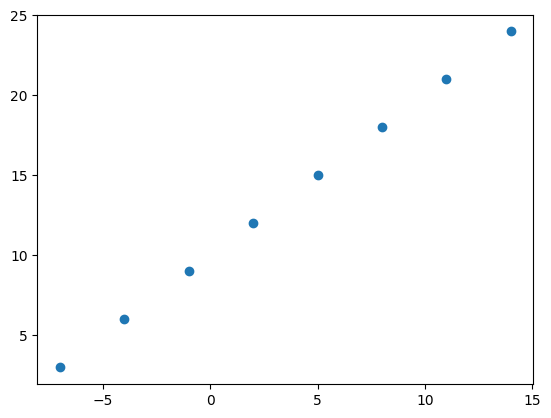

In [10]:
plt.scatter(x, y)

In [11]:
# Set seed
tf.random.set_seed(42)

#Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    # tf.keras.layers.Dense(1)
])

#mae - Mean Absolute Error
model.compile(loss = tf.keras.losses.mae, 
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=50)


Epoch 1/50
1/1 [==============================] - 0s 195ms/step - loss: 8.5258 - mae: 8.5258
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 8.3933 - mae: 8.3933
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 8.2608 - mae: 8.2608
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 8.1283 - mae: 8.1283
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 7.9958 - mae: 7.9958
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 7.8633 - mae: 7.8633
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 7.7308 - mae: 7.7308
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 7.5983 - mae: 7.5983
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 7.4658 - mae: 7.4658
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 7.4325 - mae: 7.4325
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 7.4269 - mae: 7.

In [12]:
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 50ms/step


array([[29.912941]], dtype=float32)

In [14]:
y_pred = model.predict([14.0])
y_pred

1/1 [==============================] - 0s 20ms/step


array([[24.704334]], dtype=float32)

# Improving our Model

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 142ms/step - loss: 11.6252 - mae: 11.6252
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.4927 - mae: 11.4927
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 11.3602 - mae: 11.3602
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 11.2277 - mae: 11.2277
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0952 - mae: 11.0952
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9627 - mae: 10.9627
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 10.8302 - mae: 10.8302
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6977 - mae: 10.6977
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5652 - mae: 10.5652
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.4327 - mae: 10.4327
Epoch 11/100
1/1 [==============================] - 0s 3m

In [16]:
X

array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])

In [17]:
y


<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 36ms/step


array([[30.171055]], dtype=float32)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    #tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 274ms/step - loss: 12.4609 - mae: 12.4609
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 11.3975 - mae: 11.3975
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 10.3252 - mae: 10.3252
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 9.2384 - mae: 9.2384
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 8.1317 - mae: 8.1317
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 6.9993 - mae: 6.9993
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 7.1014 - mae: 7.1014
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 7.5502 - mae: 7.5502
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 7.8520 - mae: 7.8520
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 7.7807 - mae: 7.7807
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 7.4519 - m

In [20]:
model.predict([17.0])

1/1 [==============================] - 0s 36ms/step


array([[26.66008]], dtype=float32)

# Evaluating a model



In [21]:
#Bigger Data

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# make labels
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [23]:
#visualize
import matplotlib.pyplot as plt


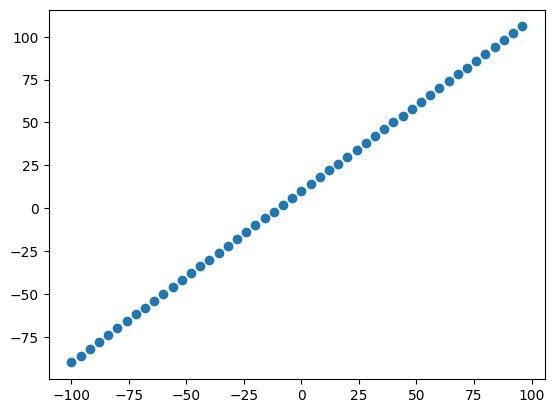

In [24]:
plt.scatter(X, y)

# 3 Sets

In [25]:
len(X)

50

In [26]:
# split the data into train and test data
X_train = X[:40] 
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_test)


(40, 10)

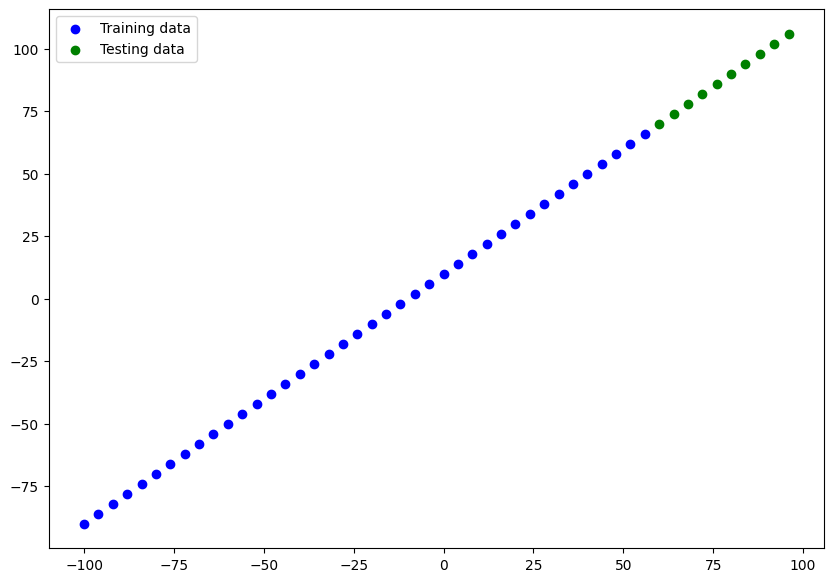

In [27]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 0s 2ms/step - loss: 63.0607 - mae: 63.0607
Epoch 2/50
2/2 [==============================] - 0s 2ms/step - loss: 28.1362 - mae: 28.1362
Epoch 3/50
2/2 [==============================] - 0s 2ms/step - loss: 10.8550 - mae: 10.8550
Epoch 4/50
2/2 [==============================] - 0s 2ms/step - loss: 11.3145 - mae: 11.3145
Epoch 5/50
2/2 [==============================] - 0s 2ms/step - loss: 12.5619 - mae: 12.5619
Epoch 6/50
2/2 [==============================] - 0s 2ms/step - loss: 9.7192 - mae: 9.7192
Epoch 7/50
2/2 [==============================] - 0s 2ms/step - loss: 8.8141 - mae: 8.8141
Epoch 8/50
2/2 [==============================] - 0s 3ms/step - loss: 9.0803 - mae: 9.0803
Epoch 9/50
2/2 [==============================] - 0s 2ms/step - loss: 19.3314 - mae: 19.3314
Epoch 10/50
2/2 [==============================] - 0s 2ms/step - loss: 10.4483 - mae: 10.4483
Epoch 11/50
2/2 [==============================] - 0s 2ms/step - loss: 8.53

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
],name="TensorFlow_regression")

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

In [31]:
model.summary()

Model: "TensorFlow_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=50, verbose=1)

Epoch 1/50
2/2 [==============================] - 0s 4ms/step - loss: 44.6884 - mae: 44.6884
Epoch 2/50
2/2 [==============================] - 0s 2ms/step - loss: 26.1055 - mae: 26.1055
Epoch 3/50
2/2 [==============================] - 0s 2ms/step - loss: 31.7849 - mae: 31.7849
Epoch 4/50
2/2 [==============================] - 0s 2ms/step - loss: 25.1277 - mae: 25.1277
Epoch 5/50
2/2 [==============================] - 0s 2ms/step - loss: 14.8583 - mae: 14.8583
Epoch 6/50
2/2 [==============================] - 0s 2ms/step - loss: 11.8185 - mae: 11.8185
Epoch 7/50
2/2 [==============================] - 0s 2ms/step - loss: 11.1468 - mae: 11.1468
Epoch 8/50
2/2 [==============================] - 0s 2ms/step - loss: 11.0739 - mae: 11.0739
Epoch 9/50
2/2 [==============================] - 0s 2ms/step - loss: 40.3201 - mae: 40.3201
Epoch 10/50
2/2 [==============================] - 0s 2ms/step - loss: 27.7338 - mae: 27.7338
Epoch 11/50
2/2 [==============================] - 0s 2ms/step - loss

In [33]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Visualizing Model's prediction

In [34]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 27ms/step


array([[ 65.440216],
       [ 69.74575 ],
       [ 74.05127 ],
       [ 78.356804],
       [ 82.66234 ],
       [ 86.96787 ],
       [ 91.27341 ],
       [ 95.57893 ],
       [ 99.88447 ],
       [104.189995]], dtype=float32)

In [35]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [36]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                     test_labels=y_test,
                    predictions = y_pred,
                    ):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", label="Training Data")
    plt.scatter(test_data, test_labels, c="g", label="Testing Data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend();

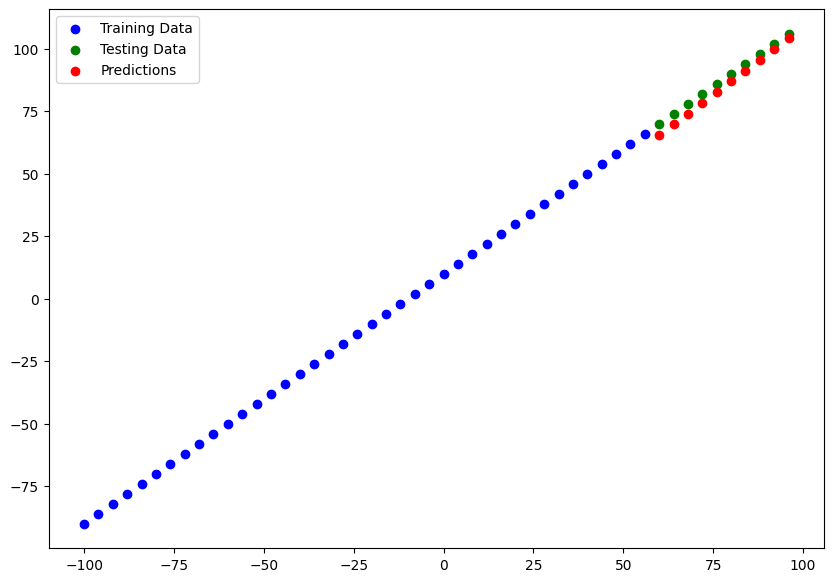

In [37]:
plot_predictions(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred,)

### Evaluating model's predictions with regression evaluation metrics

2 Main metrics:
    1) MAE - Mean Absolute Error, "On avg how wrong is each of my model's predictions"
    2) MSE - Mean Squared Error, "Square the average errors"

In [38]:
#Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 67ms/step - loss: 3.1849 - mae: 3.1849


[3.184893846511841, 3.184893846511841]

In [39]:
# Calc MAE

mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1848946>

In [40]:
# calc MSE

mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse


<tf.Tensor: shape=(), dtype=float32, numpy=10.913687>

In [41]:
#RESHAPE REQ
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 65.440216,  69.74575 ,  74.05127 ,  78.356804,  82.66234 ,
        86.96787 ,  91.27341 ,  95.57893 ,  99.88447 , 104.189995],
      dtype=float32)>

In [42]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [43]:
# Functions to reuse MAE and MSE

def mae(y_true, y_pred):
    mae = tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))
    return mae

def mse(y_true, y_pred):
    mse = tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))
    return mse

### Modelling expriments

1) 'model_1' - same 1 layer, trained with 100 epoch
2) 'model_2' - 2 layers, 100 epochs
3) 'model_3' - 3 layers, 40 epochs, Adam Optimizer (lr=0.1)

In [44]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [45]:
tf.random.set_seed(42)


model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])


model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 67.8389 - mae: 67.8389
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 32.6854 - mae: 32.6854
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 9.5991 - mae: 9.5991
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 11.6898 - mae: 11.6898
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 10.7593 - mae: 10.7593
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.9536 - mae: 9.9536
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 9.0103 - mae: 9.0103
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.0985 - mae: 9.0985
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 19.8192 - mae: 19.8192
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 10.7209 - mae: 10.7209
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 24ms/step


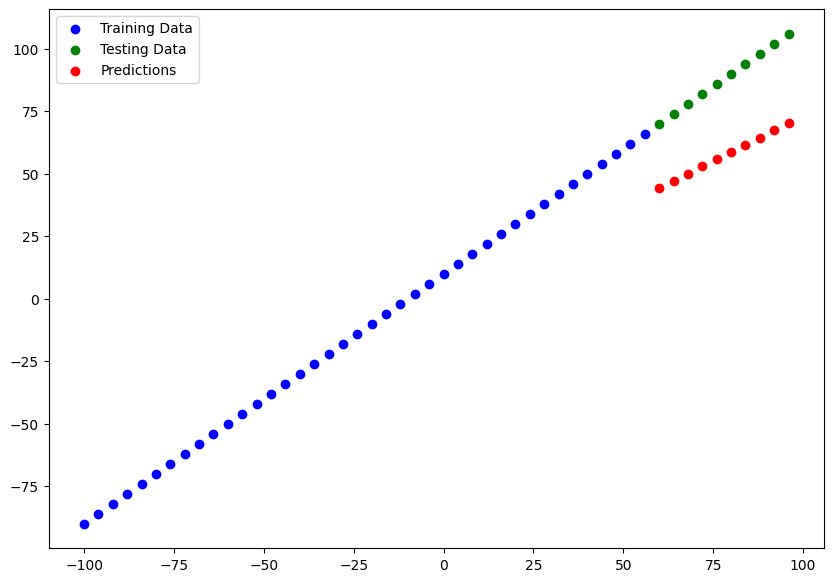

In [46]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [47]:
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.717163>,
 <tf.Tensor: shape=(), dtype=float32, numpy=954.0417>)

In [48]:
# Model 2

tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 53.2179 - mse: 4473.7407
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 11.6991 - mse: 198.4102
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 31.1436 - mse: 1428.1635
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 14.5454 - mse: 282.1280
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 20.5610 - mse: 578.0887
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 8.1697 - mse: 90.5634
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 17.0938 - mse: 373.1293
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 17.1193 - mse: 430.0708
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 30.0445 - mse: 1232.0281
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 12.1844 - mse: 198.7242
Epoch 11/100
2/2 [==============================

1/1 [==============================] - 0s 29ms/step


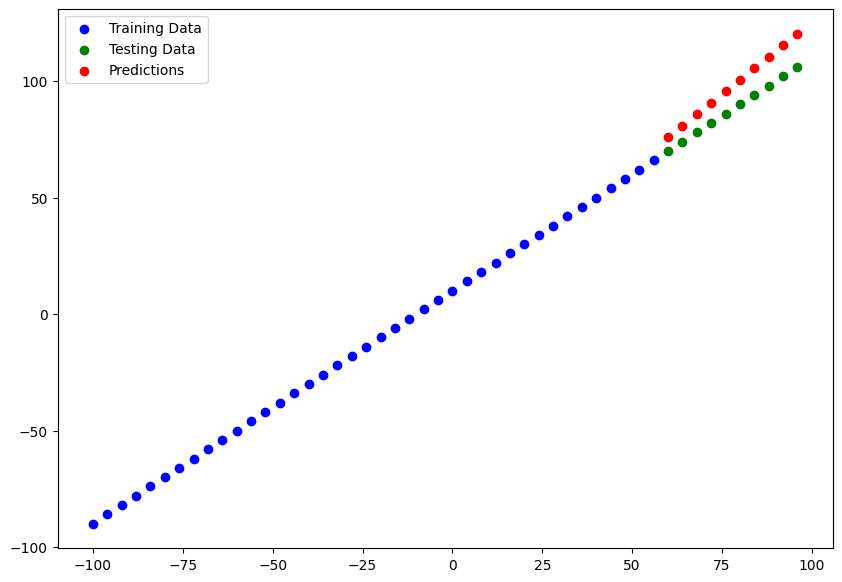

In [49]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [50]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.064272>,
 <tf.Tensor: shape=(), dtype=float32, numpy=108.575>)

In [51]:
# Model 3

tf.random.set_seed(42)


model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=["mse"]
               )

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=40)


Epoch 1/40
2/2 [==============================] - 0s 4ms/step - loss: 46.3545 - mse: 3000.9409
Epoch 2/40
2/2 [==============================] - 0s 2ms/step - loss: 12.7397 - mse: 368.9642
Epoch 3/40
2/2 [==============================] - 0s 2ms/step - loss: 18.4182 - mse: 471.8640
Epoch 4/40
2/2 [==============================] - 0s 2ms/step - loss: 17.3554 - mse: 465.5238
Epoch 5/40
2/2 [==============================] - 0s 2ms/step - loss: 6.4178 - mse: 65.1460
Epoch 6/40
2/2 [==============================] - 0s 4ms/step - loss: 6.6916 - mse: 66.4589
Epoch 7/40
2/2 [==============================] - 0s 2ms/step - loss: 11.4663 - mse: 213.0627
Epoch 8/40
2/2 [==============================] - 0s 2ms/step - loss: 12.6497 - mse: 228.4749
Epoch 9/40
2/2 [==============================] - 0s 2ms/step - loss: 6.5755 - mse: 73.2218
Epoch 10/40
2/2 [==============================] - 0s 2ms/step - loss: 13.3793 - mse: 273.3949
Epoch 11/40
2/2 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 29ms/step


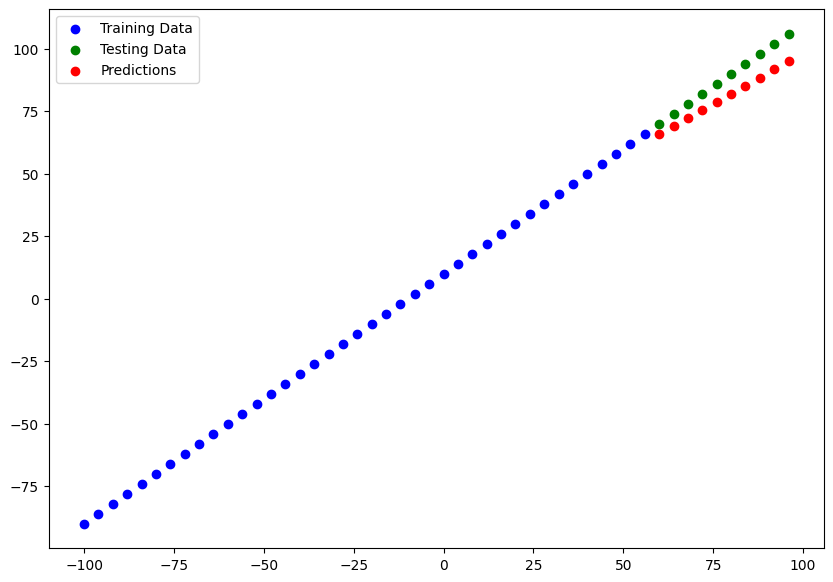

In [52]:
y_pred_3 = model_3.predict(y_test)
plot_predictions(predictions=y_pred_3)

In [53]:
y_pred_3, y_test

(array([[65.8025  ],
        [69.04253 ],
        [72.282555],
        [75.52258 ],
        [78.76261 ],
        [82.00263 ],
        [85.24265 ],
        [88.48267 ],
        [91.72271 ],
        [94.96274 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [54]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=7.617382>,
 <tf.Tensor: shape=(), dtype=float32, numpy=62.789387>)

In [73]:
!pip install pandas


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


### Comparing the results

In [74]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
                 
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

model        mae         mse
0  model_1  30.717163  954.041687
1  model_2  10.064272  108.574997
2  model_3   7.617382   62.789387

In [75]:
 model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                40        
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 261 (1.02 KB)
Trainable params: 261 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
# Tracking your Experiments

#TensorBoard - track modelling expriments.
#Weights and Biases 

### Save the models

In [78]:
# Save the model using SavedModel format

model_2.save("model2_SavedModel_Format")

INFO:tensorflow:Assets written to: model2_SavedModel_Format/assets


INFO:tensorflow:Assets written to: model2_SavedModel_Format/assets


In [63]:
# SAve the model using HDF5 format

model_3.save("Model3_HDF5_Format.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loading the saved models

In [64]:
loaded_SavedModel_Format = tf.keras.models.load_model("model2_SavedModel_Format")
loaded_SavedModel_Format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_Format_preds = loaded_SavedModel_Format.predict(X_test)
model_2_preds == loaded_SavedModel_Format_preds

1/1 [==============================] - 0s 26ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [66]:
model_2_preds, loaded_SavedModel_Format_preds

(array([[ 75.83551 ],
        [ 80.77524 ],
        [ 85.71496 ],
        [ 90.654686],
        [ 95.5944  ],
        [100.53414 ],
        [105.473854],
        [110.41358 ],
        [115.35331 ],
        [120.29304 ]], dtype=float32),
 array([[ 75.83551 ],
        [ 80.77524 ],
        [ 85.71496 ],
        [ 90.654686],
        [ 95.5944  ],
        [100.53414 ],
        [105.473854],
        [110.41358 ],
        [115.35331 ],
        [120.29304 ]], dtype=float32))

In [67]:
mae(y_test, model_2_preds) == mae(y_test, loaded_SavedModel_Format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [68]:
# Loading the HDF5 Model

loaded_HDF5_Model = tf.keras.models.load_model("Model3_HDF5_Format.h5")
loaded_HDF5_Model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                40        
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 261 (1.02 KB)
Trainable params: 261 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
model_3_preds = model_3.predict(X_test)
loaded_HDF5_Model_preds = loaded_HDF5_Model.predict(X_test)
model_3_preds == loaded_HDF5_Model_preds

1/1 [==============================] - 0s 29ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Working with some larger Data

In [70]:
# Data from RAW Github to CSV

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [71]:
insurance

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [79]:
insurance_one_hot=pd.get_dummies(insurance)

insurance_one_hot.head()

age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400        True     False      False   
1   18  33.770         1   1725.55230       False      True       True   
2   28  33.000         3   4449.46200       False      True       True   
3   33  22.705         0  21984.47061       False      True       True   
4   32  28.880         0   3866.85520       False      True       True   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0        True             False             False             False   
1       False             False             False              True   
2       False             False             False              True   
3       False             False              True             False   
4       False             False              True             False   

   region_southwest  
0              True  
1             False  
2             False  
3             False  
4             False

In [81]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"] #Dependant Variable 

In [105]:
X.head()


age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0   19  27.900         0        True     False      False        True   
1   18  33.770         1       False      True       True       False   
2   28  33.000         3       False      True       True       False   
3   33  22.705         0       False      True       True       False   
4   32  28.880         0       False      True       True       False   

   region_northeast  region_northwest  region_southeast  region_southwest  
0             False             False             False              True  
1             False             False              True             False  
2             False             False              True             False  
3             False              True             False             False  
4             False              True             False             False

In [85]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [87]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 45.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 31.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [126]:
# Train Test Split using scikit
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [130]:
X_test.head()

age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
764    45  25.175         2        True     False       True       False   
887    36  30.020         0        True     False       True       False   
890    64  26.885         0        True     False      False        True   
1293   46  25.745         3       False      True       True       False   
259    19  31.920         0       False      True      False        True   

      region_northeast  region_northwest  region_southeast  region_southwest  
764               True             False             False             False  
887              False              True             False             False  
890              False              True             False             False  
1293             False              True             False             False  
259              False              True             False             False

In [117]:
#Model

tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    #tf.keras.layers.Dense(40),
    tf.keras.layers.Dense(1),
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                        metrics=["mae"])

X_train = np.asarray(X_train).astype(np.float32)
#y_train = np.asarray(y_train).astype('float32')

insurance_model.fit(X_train, y_train, epochs=50)
    
    

Epoch 1/50
34/34 [==============================] - 0s 779us/step - loss: 8845.9727 - mae: 8845.9727
Epoch 2/50
34/34 [==============================] - 0s 654us/step - loss: 7059.5215 - mae: 7059.5215
Epoch 3/50
34/34 [==============================] - 0s 736us/step - loss: 6388.6113 - mae: 6388.6113
Epoch 4/50
34/34 [==============================] - 0s 705us/step - loss: 5966.0889 - mae: 5966.0889
Epoch 5/50
34/34 [==============================] - 0s 660us/step - loss: 5231.3037 - mae: 5231.3037
Epoch 6/50
34/34 [==============================] - 0s 670us/step - loss: 4219.8315 - mae: 4219.8315
Epoch 7/50
34/34 [==============================] - 0s 672us/step - loss: 4288.0181 - mae: 4288.0181
Epoch 8/50
34/34 [==============================] - 0s 594us/step - loss: 3959.1458 - mae: 3959.1458
Epoch 9/50
34/34 [==============================] - 0s 623us/step - loss: 3884.5237 - mae: 3884.5237
Epoch 10/50
34/34 [==============================] - 0s 615us/step - loss: 3908.8127 - mae:

In [133]:
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 811us/step - loss: 3181.0225 - mae: 3181.0225


[3181.0224609375, 3181.0224609375]

In [136]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

## Improve model

1) Add extra layer
2) Train for longer


In [147]:
tf.random.set_seed(42)


insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.8),
                         metrics=["mae"])

X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
insurance_model_2.fit(X_train, y_train, epochs=200)
                         

Epoch 1/200
34/34 [==============================] - 0s 784us/step - loss: 10525.3174 - mae: 10525.3174
Epoch 2/200
34/34 [==============================] - 0s 722us/step - loss: 6013.5176 - mae: 6013.5176
Epoch 3/200
34/34 [==============================] - 0s 778us/step - loss: 6444.5708 - mae: 6444.5708
Epoch 4/200
34/34 [==============================] - 0s 710us/step - loss: 5321.6733 - mae: 5321.6733
Epoch 5/200
34/34 [==============================] - 0s 648us/step - loss: 7070.4907 - mae: 7070.4907
Epoch 6/200
34/34 [==============================] - 0s 679us/step - loss: 5292.4946 - mae: 5292.4946
Epoch 7/200
34/34 [==============================] - 0s 667us/step - loss: 4264.1113 - mae: 4264.1113
Epoch 8/200
34/34 [==============================] - 0s 669us/step - loss: 4948.2075 - mae: 4948.2075
Epoch 9/200
34/34 [==============================] - 0s 675us/step - loss: 4546.3779 - mae: 4546.3779
Epoch 10/200
34/34 [==============================] - 0s 758us/step - loss: 4286

In [153]:
# Model 3 

tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
                          metrics=["mae"],
                         )

hist = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 733us/step - loss: 8627.0400 - mae: 8627.0400
Epoch 2/200
34/34 [==============================] - 0s 763us/step - loss: 6781.0171 - mae: 6781.0171
Epoch 3/200
34/34 [==============================] - 0s 703us/step - loss: 6183.5469 - mae: 6183.5469
Epoch 4/200
34/34 [==============================] - 0s 660us/step - loss: 5331.8179 - mae: 5331.8179
Epoch 5/200
34/34 [==============================] - 0s 684us/step - loss: 4036.5466 - mae: 4036.5466
Epoch 6/200
34/34 [==============================] - 0s 730us/step - loss: 3944.7085 - mae: 3944.7085
Epoch 7/200
34/34 [==============================] - 0s 793us/step - loss: 3932.3757 - mae: 3932.3757
Epoch 8/200
34/34 [==============================] - 0s 659us/step - loss: 4086.8308 - mae: 4086.8308
Epoch 9/200
34/34 [==============================] - 0s 733us/step - loss: 3801.7571 - mae: 3801.7571
Epoch 10/200
34/34 [==============================] - 0s 676us/step - loss: 3792.6

In [154]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 906us/step - loss: 3192.9805 - mae: 3192.9805


[3192.98046875, 3192.98046875]

Text(0.5, 0, 'epochs')

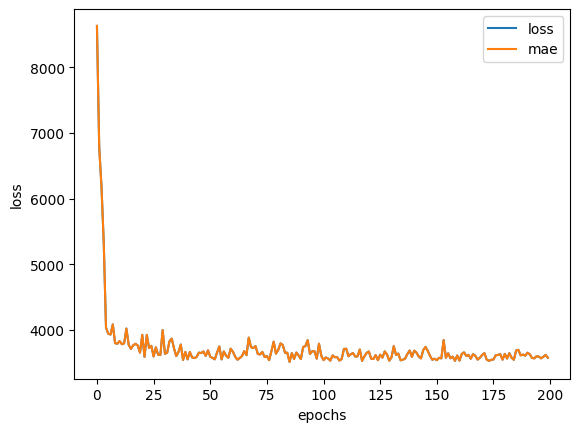

In [155]:
pd.DataFrame(hist.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Pre-Processing Data (Normalization and Standardization)

In [157]:
# Normalize

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [163]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [168]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [169]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [171]:
# neural network model

tf.random.set_seed(42)


insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"],
                                 )
y_train = np.asarray(y_train).astype(np.float32)

insurance_model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 772us/step - loss: 13344.0039 - mae: 13344.0039
Epoch 2/100
34/34 [==============================] - 0s 804us/step - loss: 13335.9043 - mae: 13335.9043
Epoch 3/100
34/34 [==============================] - 0s 789us/step - loss: 13315.9990 - mae: 13315.9990
Epoch 4/100
34/34 [==============================] - 0s 715us/step - loss: 13273.6445 - mae: 13273.6445
Epoch 5/100
34/34 [==============================] - 0s 670us/step - loss: 13197.2188 - mae: 13197.2188
Epoch 6/100
34/34 [==============================] - 0s 700us/step - loss: 13075.5918 - mae: 13075.5918
Epoch 7/100
34/34 [==============================] - 0s 648us/step - loss: 12898.4980 - mae: 12898.4980
Epoch 8/100
34/34 [==============================] - 0s 674us/step - loss: 12655.7998 - mae: 12655.7998
Epoch 9/100
34/34 [==============================] - 0s 622us/step - loss: 12337.2734 - mae: 12337.2734
Epoch 10/100
34/34 [==============================] - 0s 719us/s

In [172]:
y_test = np.asarray(y_test).astype(np.float32)

insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 764us/step - loss: 3438.1746 - mae: 3438.1746


[3438.174560546875, 3438.174560546875]

## End of the Regression Notebook